# Data Characteristics:
Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

The concrete compressive strength is a highly nonlinear function of age and ingredients .These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.
    
The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

The compressive strength of concrete can be calculated by the failure load divided with the cross sectional area resisting the load and reported in pounds per square inch in US customary units and mega pascals (MPa) in SI units. Concrete's compressive strength requirements can vary from 2500 psi (17 MPa) for residential concrete to 4000psi (28 MPa) and higher in commercial structures. Higher strengths upto and exceeding 10,000 psi (70 MPa) are specified for certain applications.

# Attribute information
* Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
* Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
* Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
* Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
* Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
* Age -- quantitative -- Day (1~365) -- Input Variable
* Concrete compressive strength -- quantitative -- MPa(megapascals) -- Output Variable

In [16]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline


# Data - first few rows

In [17]:
data = pd.read_csv("concrete.csv")
data.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [18]:
#renaming columns
data = data.rename(columns={'cement':"cement",
       'slag':"furnace_slag",
       'ash':"fly_ash",
       'water':"water",
       'superplastic':"super_plasticizer",
       'coarseagg':"coarse_agg",
       'fineagg':"fine_agg", 'age':"age",
       'strength':"compressive_strength"})

# Data Information

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                  1030 non-null float64
furnace_slag            1030 non-null float64
fly_ash                 1030 non-null float64
water                   1030 non-null float64
super_plasticizer       1030 non-null float64
coarse_agg              1030 non-null float64
fine_agg                1030 non-null float64
age                     1030 non-null int64
compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Missing values

In [20]:
print (data.isnull().sum())

cement                  0
furnace_slag            0
fly_ash                 0
water                   0
super_plasticizer       0
coarse_agg              0
fine_agg                0
age                     0
compressive_strength    0
dtype: int64


# Data dimensions

In [21]:
print("Number of rows    :",data.shape[0])
print("Number of columns :",data.shape[1])

Number of rows    : 1030
Number of columns : 9


# Surface plot for variables
* X - Axis = columns encoded as [ coarse_agg : 1, fine_agg : 2 , cement : 3 , fly_ash : 4 , water : 5 ,      furnace_slag:6,super_plasticizer : 7 , compressive_strength : 8 , age : 9]
* Y - Axis = index.
* Z - Axis = values .

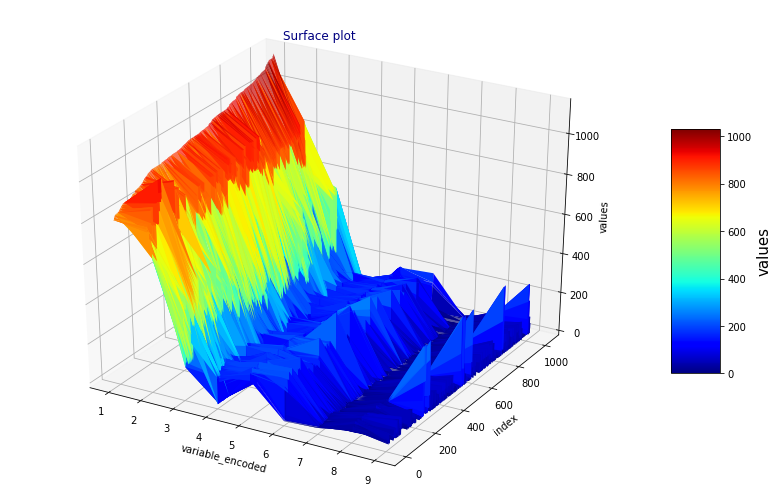

In [22]:
from mpl_toolkits.mplot3d import Axes3D
data1 = data.copy()

data1 = data1.sort_values(by=['coarse_agg'],ascending=True).reset_index()

data1 = data1[['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer',
               'coarse_agg', 'fine_agg', 'age', 'compressive_strength']] 

df = data1.unstack().reset_index()
df.columns = ["X","Y","Z"]


df["X"] = df["X"].map({'coarse_agg':1, 'fine_agg':2 , 
                       'cement':3, 'furnace_slag':6, 'fly_ash':4,
                       'water':5, 'super_plasticizer':7,
                        'age':9, 'compressive_strength':8})
 
fig = plt.figure(figsize=(14,9))

ax  = fig.gca(projection = "3d")

surf = ax.plot_trisurf(df["X"],df["Y"],df["Z"],cmap="jet",linewidth=2)
lab  = fig.colorbar(surf,shrink=.5,aspect=5)
lab.set_label("values",fontsize=15)

ax.set_xlabel("variable_encoded")
ax.set_ylabel("index")
ax.set_zlabel("values")

plt.title("Surface plot",color="navy")
plt.show()

# Variables summary

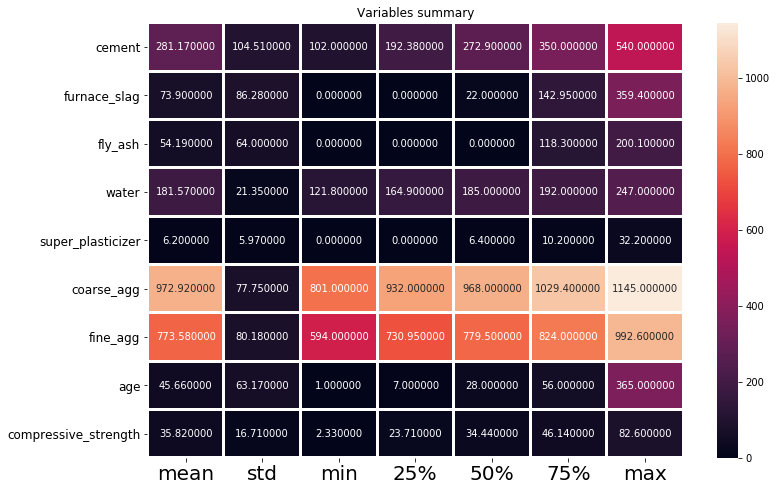

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

# Ingredients Distribution

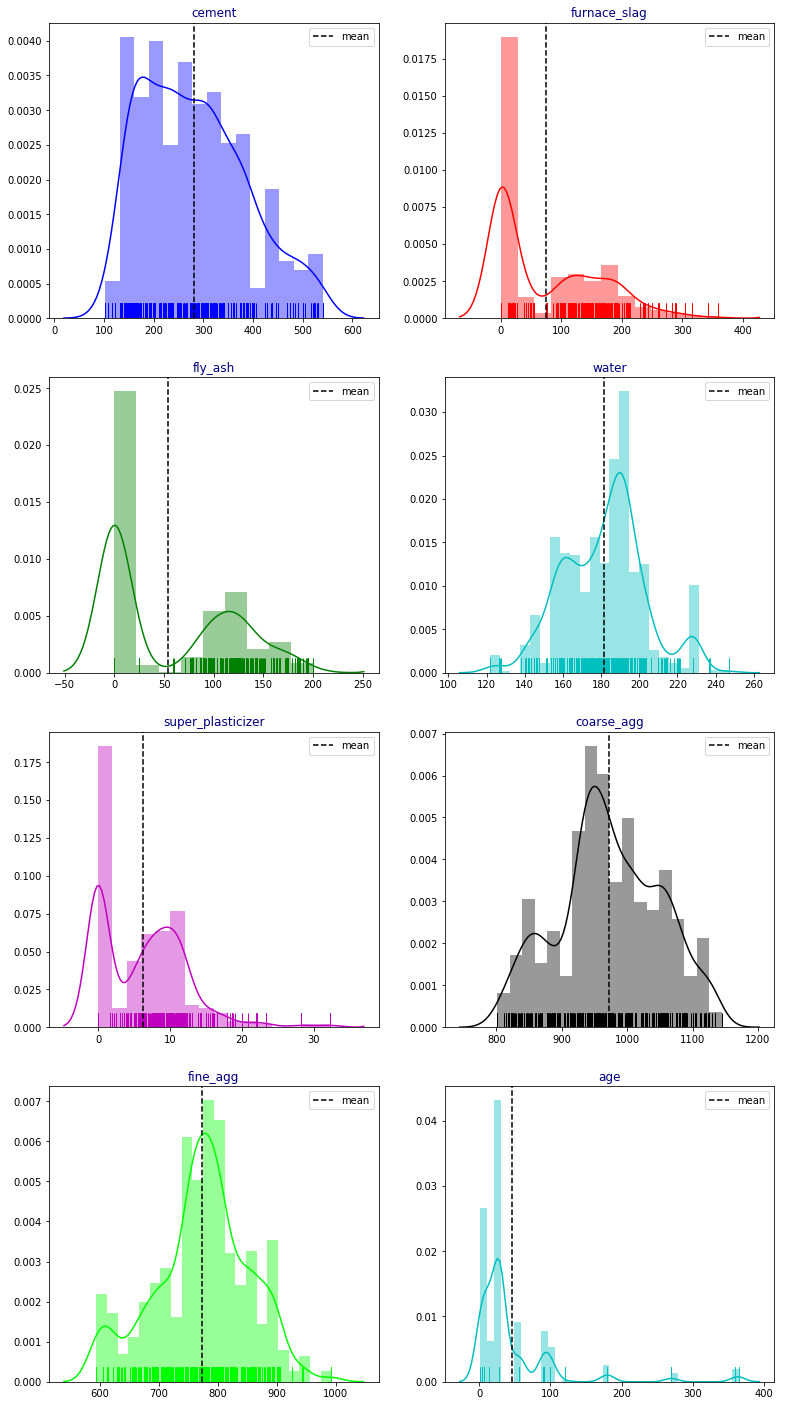

In [24]:
cols = [i for i in data.columns if i not in 'compressive_strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(data[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

# Compressive strength distribution

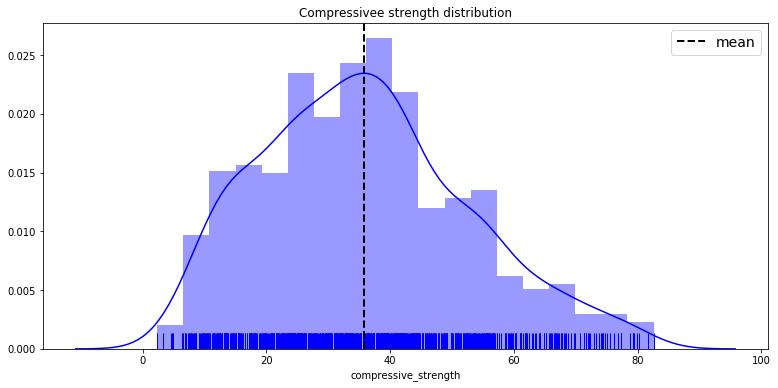

In [25]:
plt.figure(figsize=(13,6))
sns.distplot(data["compressive_strength"],color="b",rug=True)
plt.axvline(data["compressive_strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressivee strength distribution")
plt.show()

# Pair plot between variables

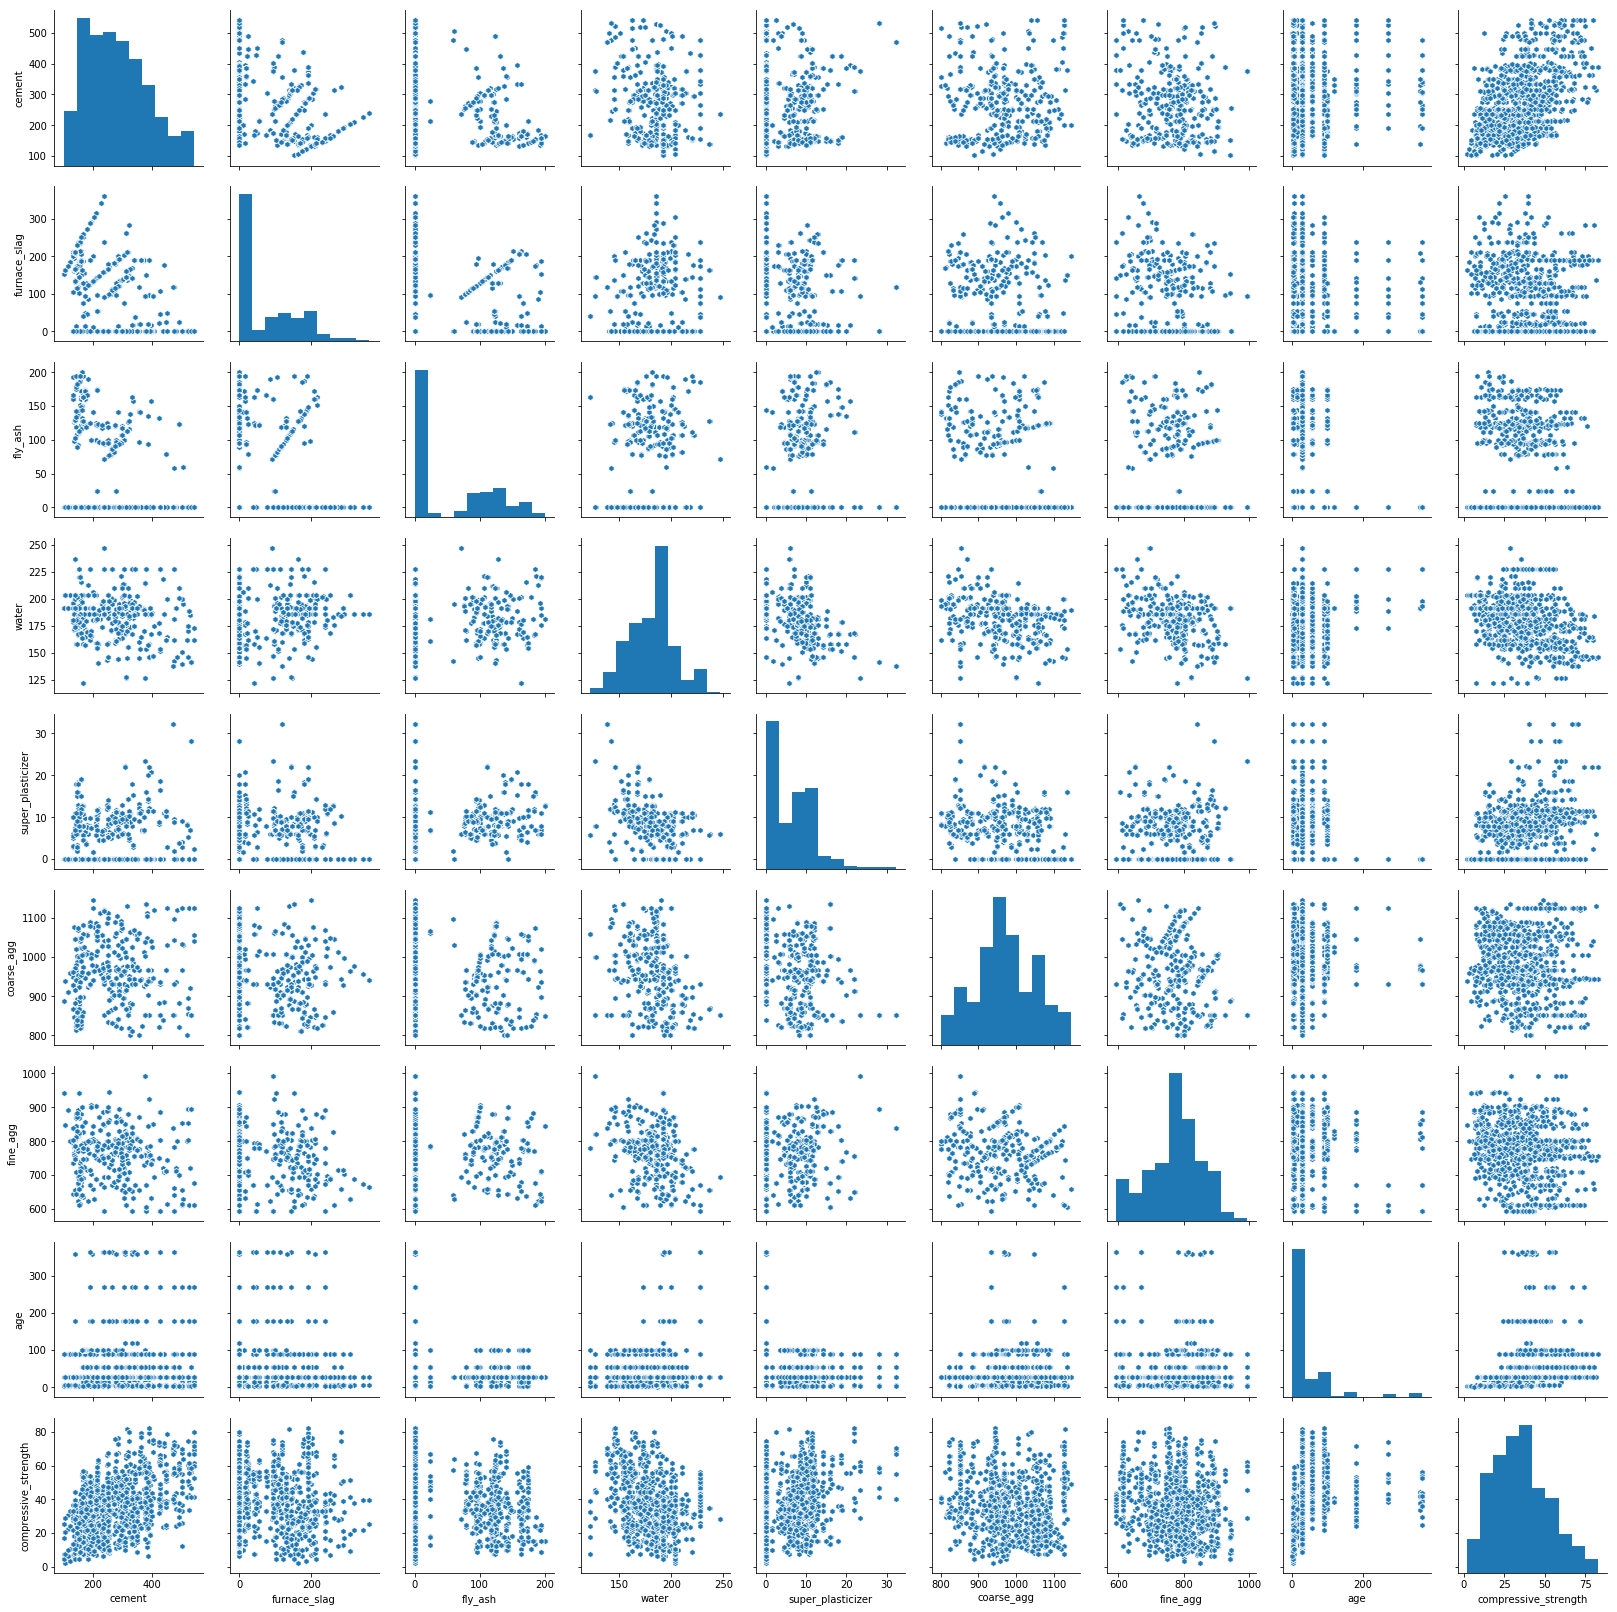

In [26]:
sns.pairplot(data,markers="h")
plt.show()

# Contour plot between ingredients and compressive strength

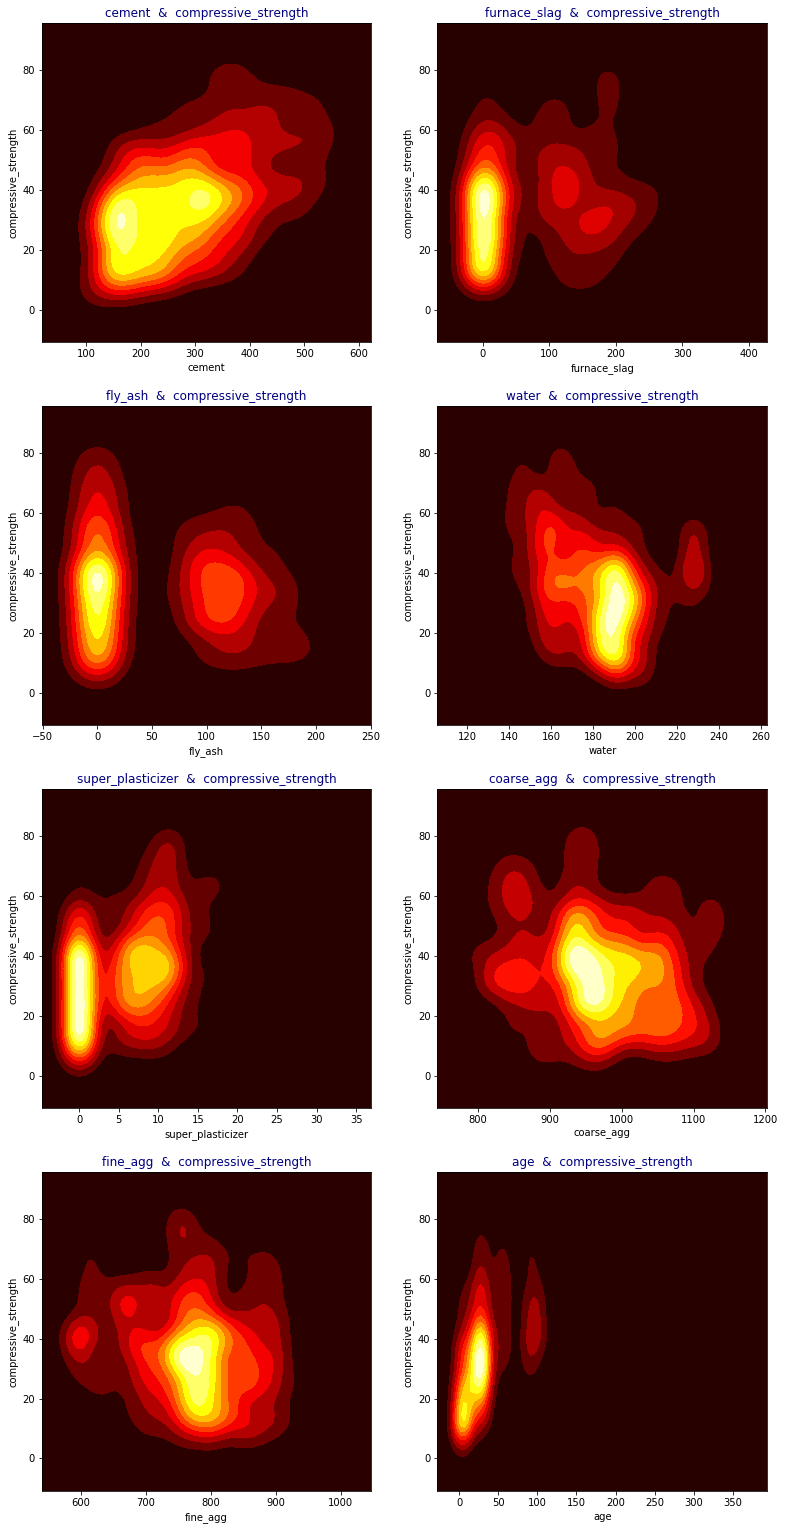

In [27]:
cols = [i for i in data.columns if i not in 'compressive_strength']
length = len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.kdeplot(data[i],
                data["compressive_strength"],
                cmap="hot",
                shade=True)
    plt.title(i+"  &  compressive_strength",color="navy")


# Correlation between variables

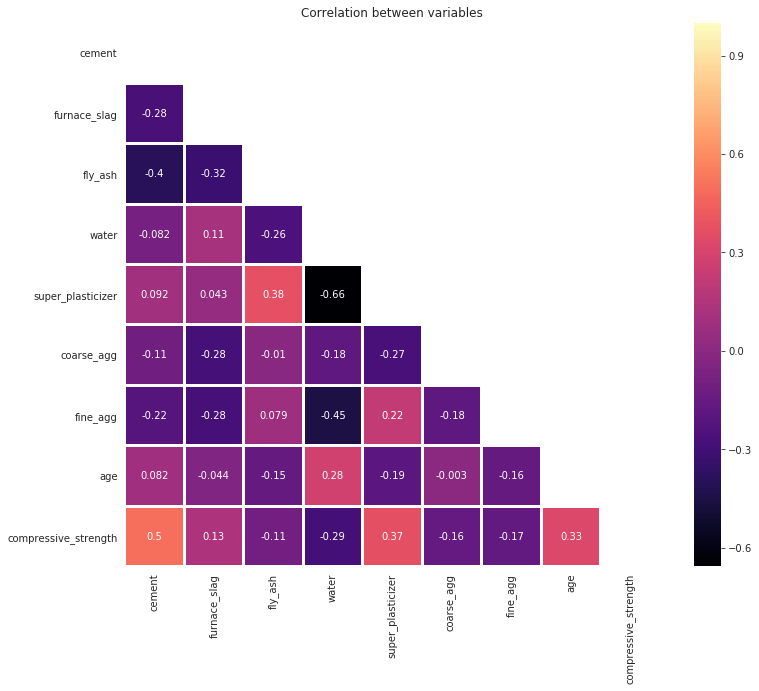

In [28]:
cor = data.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))

with sns.axes_style("white"):
    sns.heatmap(cor,annot=True,linewidth=2,
                mask = mask,cmap="magma")
plt.title("Correlation between variables")
plt.show()

# Swarm plot for variables

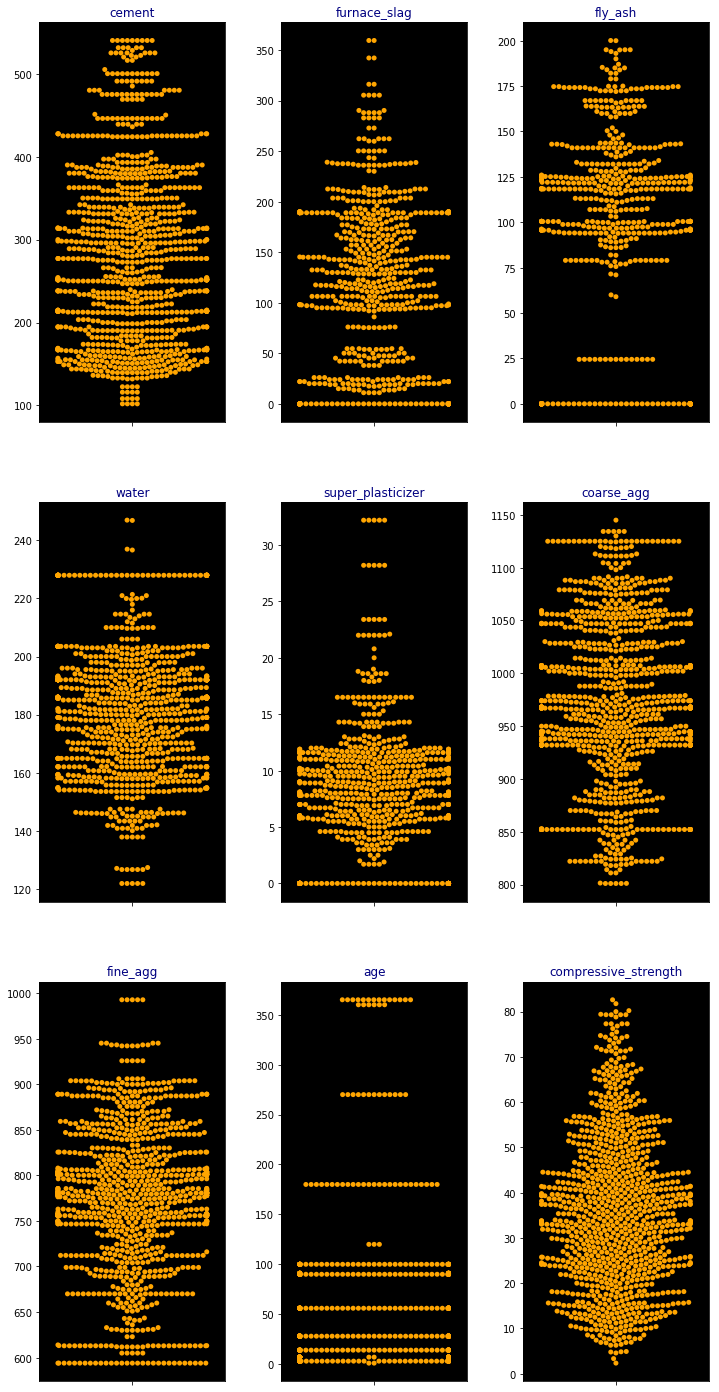

In [29]:

cols = ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer',
       'coarse_agg', 'fine_agg', 'age', 'compressive_strength'] 



length = len(cols)

plt.figure(figsize=(12,25))

for i,j in itertools.zip_longest(cols,range(length)):
    
    plt.subplot(3,3,j+1)
    ax = sns.swarmplot( y = data[i],color="orange")
    ax.set_facecolor("k")
    ax.set_ylabel("")
    ax.set_title(i,color="navy")
    plt.subplots_adjust(wspace = .3)

# 3D plot for cement ,compressive strength and super plasticizer
* X - Axis = cement.
* Y - Axis = compressive strength.
* Z - Axis = super plasticizer.
* Color    = Age

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,11))

ax  = fig.gca(projection = "3d")
#plt.subplot(111,projection = "3d") 

plot =  ax.scatter(data["cement"],
           data["compressive_strength"],
           data["super_plasticizer"],
           linewidth=1,edgecolor ="k",
           c=data["age"],s=100,cmap="cool")

ax.set_xlabel("cement")
ax.set_ylabel("compressive_strength")
ax.set_zlabel("super_plasticizer")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("AGE",fontsize = 15)

plt.title("3D plot for cement,compressive strength and super plasticizer",color="navy")
plt.show()

In [31]:
#Binning days to months
def label(data):
    if data["age"] <= 30:
        return "1 month"
    if data["age"] > 30 and data["age"] <= 60 :
        return "2 months"
    if data["age"] > 60 and data["age"] <= 90 :
        return "3 months"
    if data["age"] > 90 and data["age"] <= 120 :
        return "4 months"
    if data["age"] > 120 and data["age"] <= 150 :
        return "5 months"
    if data["age"] > 150 and data["age"] <= 180 :
        return "6 months"
    if data["age"] > 180 and data["age"] <= 210 :
        return "7 months"
    if data["age"] > 210 and data["age"] <= 240 :
        return "8 months"
    if data["age"] > 240 and data["age"] <= 270 :
        return "9 months"
    if data["age"] > 270 and data["age"] <= 300 :
        return "10 months"
    if data["age"] > 300 and data["age"] <= 330 :
        return "11 months"
    if data["age"] > 330 :
        return "12 months"
data["age_months"] = data.apply(lambda data:label(data) , axis=1)


# Age distribution in months

In [32]:
plt.figure(figsize=(12,5))
order = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
ax = sns.countplot(data["age_months"],
                   order=order,linewidth=2,
                   edgecolor = "k"*len(order),
                   palette=["w"])
ax.set_facecolor("royalblue")
plt.title("age distribution in months")
plt.grid(True,alpha=.3)
plt.show()

# Compreesive strength by months

In [33]:
age_mon = data.groupby("age_months")["compressive_strength"].describe().reset_index()

order  = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
cols   = [ 'mean', 'std' , 'min' , 'max']
length = len(cols)
cs     = ["b","orange","white","r"] 

fig = plt.figure(figsize=(13,15))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,1,j+1)
    ax = sns.pointplot("age_months",i,data=age_mon,
                       order=order,
                       markers="H",
                       linestyles="dotted",color=k)
    plt.subplots_adjust(hspace=.5)
    ax.set_facecolor("k")
    plt.title(i+" - compressive strength by months",color="navy")


# parllell coordinates plot for 3 categories 
* Concrete's compressive strength requirements can vary from 2500 psi (17 MPa) for residential concrete to 4000psi (28 MPa) and higher in commercial structures. Higher strengths upto and exceeding 10,000 psi (70 MPa) are specified for certain applications.
* Binning compressive strength in 3 categories.
* category 1 - mpa  less than 17.
* category 2 - mpa in between 17 to 28.
* category 3 - mpa greater than 28.

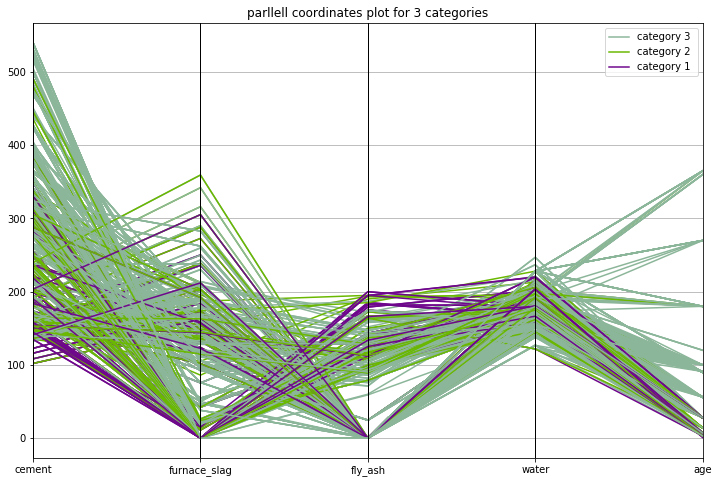

In [34]:
data2  =  data.copy()

def lab(data2):
    if data2["compressive_strength"] <= 17:
        return "category 1"
    if data2["compressive_strength"] >17 and data2["compressive_strength"] <= 28 :
        return "category 2"
    if data2["compressive_strength"] >28 :
        return "category 3 "
    
data2["compressive_strength_category"] = data2.apply(lambda data2:lab(data2) ,axis =1)

from pandas.plotting import parallel_coordinates

cols1 = ['cement', 'furnace_slag','fly_ash', 'water',"compressive_strength_category",'age']

plt.figure(figsize=(12,8))
parallel_coordinates(data2[cols1],"compressive_strength_category")
plt.title("parllell coordinates plot for 3 categories")
plt.show()

# scatter plot between cement and water
* X - axis = water.
* Y - axis = cement.
* SIZE and COLOR = compressive strength.

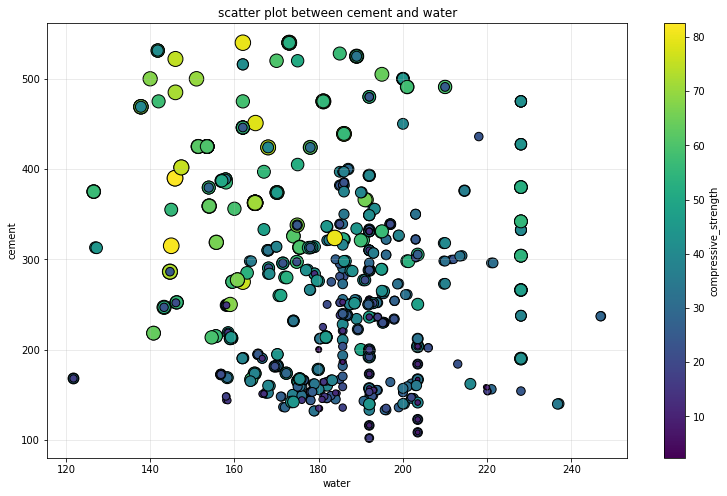

In [35]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(data["water"],data["cement"],
            c=data["compressive_strength"],s=data["compressive_strength"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("water")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between cement and water")
plt.grid(True,alpha=.3)
plt.show()

# scatter plot between fine_agg and coarse_agg.
* X - axis = fine_agg.
* Y - axis = coarse_agg.
* SIZE and COLOR = compressive strength.

In [36]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(data["fine_agg"],data["coarse_agg"],
            c=data["compressive_strength"],s=data["compressive_strength"]*4,
            linewidth=1,edgecolor="k",cmap="viridis_r")
ax.set_facecolor("w")
ax.set_xlabel("fine_agg")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between fine_agg and coarse_agg")
plt.grid(True,alpha=.3)
plt.show()


### Splitting train and test data

In [37]:
#Splitting train and test data
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size =.3,random_state = 123)
train_X = train[[x for x in train.columns if x not in ["compressive_strength"] + ["age_months"]]]
train_Y = train["compressive_strength"]
test_X  = test[[x for x in test.columns if x not in ["compressive_strength"] + ["age_months"]]]
test_Y  = test["compressive_strength"]


# Model

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

target = "compressive_strength"
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type):
    
    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(dtrainx,dtrainy)
    prediction = algorithm.predict(dtestx)
    print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(dtesty,prediction)) )
    print ("***************************************************************************")
    prediction = pd.DataFrame(prediction)
    cross_val = cross_val_score(algorithm,dtrainx,dtrainy,cv=20,scoring="neg_mean_squared_error")
    cross_val = cross_val.ravel()
    print ("CROSS VALIDATION SCORE")
    print ("************************")
    print ("cv-mean :",cross_val.mean())
    print ("cv-std  :",cross_val.std())
    print ("cv-max  :",cross_val.max())
    print ("cv-min  :",cross_val.min())
    
    plt.figure(figsize=(13,28))
    plt.subplot(211)
    
    testy = dtesty.reset_index()["compressive_strength"]
    
    ax = testy.plot(label="originals",figsize=(12,13),linewidth=2)
    ax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)
  #  plt.axhline(testy.mean(),color = "r",linestyle="dashed",label=("original_mean:",testy.mean()))
  #  plt.axhline(prediction[0].mean(),color="b",linestyle = "dashed",label=("prediction_mean:",prediction[0].mean()))
    plt.legend(loc="best")
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    ax.set_facecolor("k")
    
    plt.subplot(212)
    
    if of_type == "coef":
        coef = pd.DataFrame(algorithm.coef_.ravel())
        coef["feat"] = dtrainx.columns
        ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        ax1.set_facecolor("lightgrey")
        ax1.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title('FEATURE IMPORTANCES')
    
    elif of_type == "feat":
        coef = pd.DataFrame(algorithm.feature_importances_)
        coef["feat"] = dtrainx.columns
        ax2 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        ax2.set_facecolor("lightgrey")
        ax2.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title('FEATURE IMPORTANCES')

import warnings
warnings.filterwarnings("ignore")


# Linear Regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.076741927128781
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -114.16803383252382
cv-std  : 28.611660577174014
cv-max  : -61.65504407969559
cv-min  : -168.58083340834648


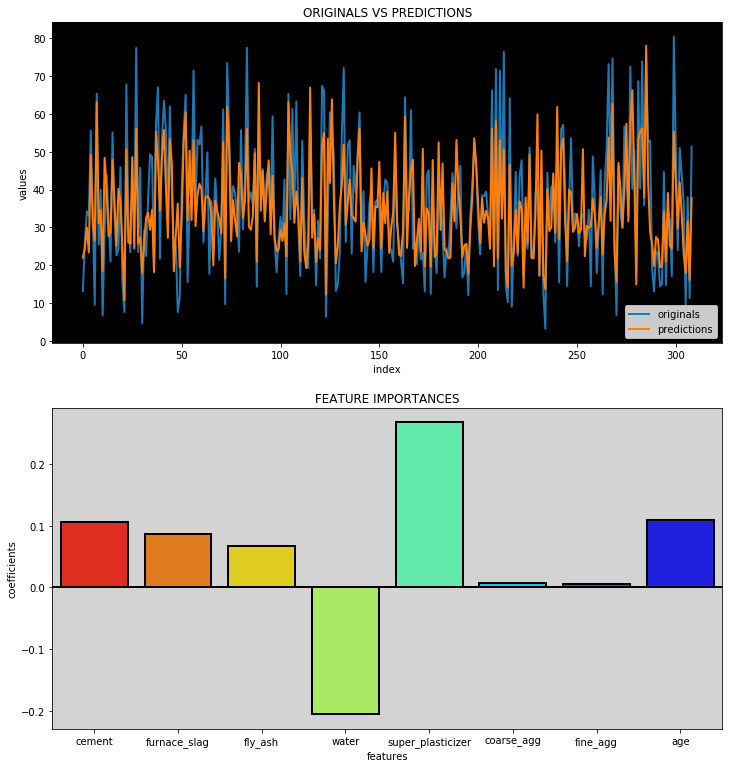

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,train_X,train_Y,test_X,test_Y,"coef")

# Lasso Regression

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.098703563233572
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -114.1280709627863
cv-std  : 28.406715972690694
cv-max  : -62.317893774059065
cv-min  : -170.21067452576474


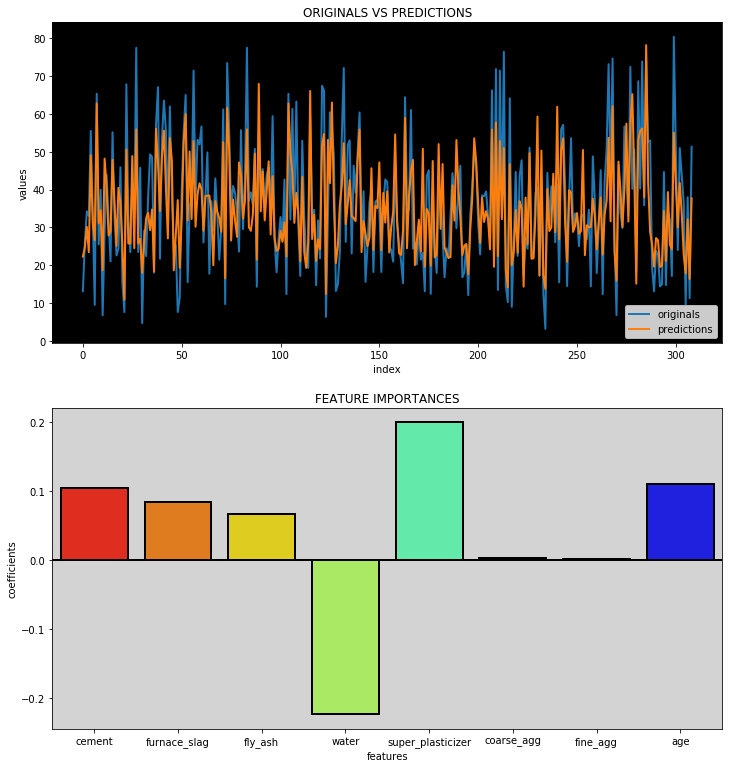

In [43]:
from sklearn.linear_model import Ridge,Lasso
ls = Lasso()
model(ls,train_X,train_Y,test_X,test_Y,"coef")

# Ridge Regression

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.07674246088481
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -114.16796146547881
cv-std  : 28.611506404155197
cv-max  : -61.655312436439154
cv-min  : -168.58145463313338


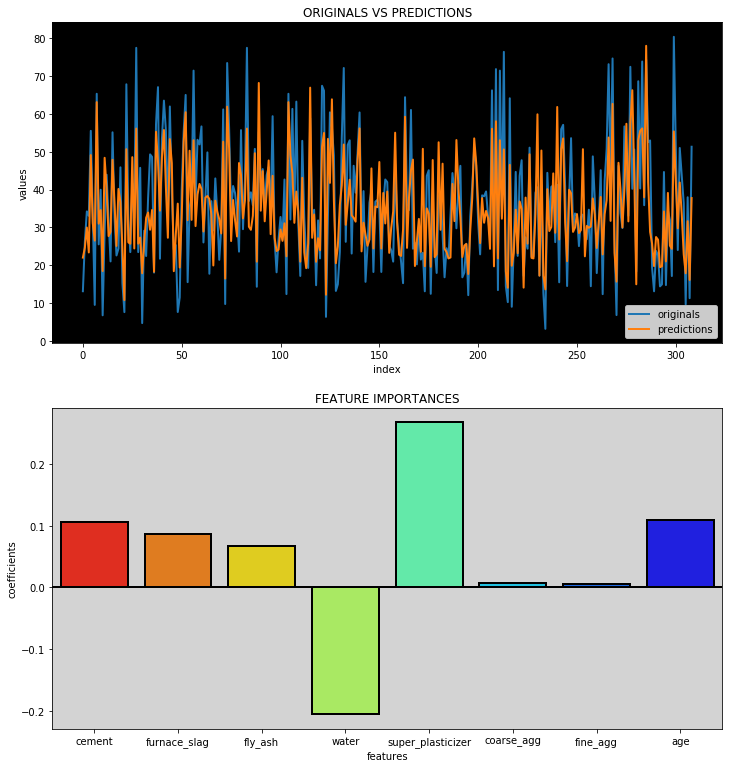

In [44]:
rigde = Ridge()
model(rigde,train_X,train_Y,test_X,test_Y,"coef")

# KNN Regressor

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')
************************************************************************
ROOT MEAN SQUARED ERROR :  9.019473816267226
************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -91.49304839444444
cv-std  : 23.491661073494335
cv-max  : -42.468895
cv-min  : -123.01407077777776


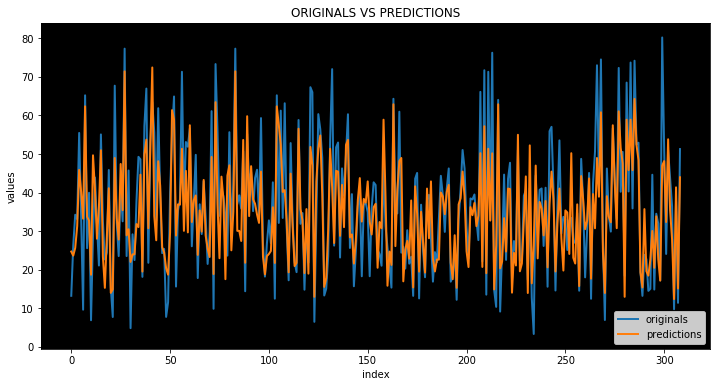

In [45]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(train_X,train_Y)

predictions = knn.predict(test_X)
predictions = pd.DataFrame(predictions)

test_y_new = test_Y.reset_index()
test_y_new = test_y_new["compressive_strength"]


ax3 = test_y_new.plot(label="originals",figsize=(12,6),linewidth=2)
ax3 = predictions[0].plot(label="predictions",figsize=(12,6),linewidth=2)
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")
ax3.set_facecolor("k")

print (knn)
print ("************************************************************************")
print ("ROOT MEAN SQUARED ERROR : ",np.sqrt(mean_squared_error(test_Y,predictions)))
cross_valid = cross_val_score(knn,train_X,train_Y,cv=20,scoring="neg_mean_squared_error")
cross_valid = cross_valid.ravel()
print ("************************************************************************")
print ("CROSS VALIDATION SCORE")
print ("************************")
print ("cv-mean :",cross_valid.mean())
print ("cv-std  :",cross_valid.std())
print ("cv-max  :",cross_valid.max())
print ("cv-min  :",cross_valid.min())

# Ada Boost Regressor

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
***************************************************************************
ROOT MEAN SQUARED ERROR : 7.403439590183363
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -62.49198564555426
cv-std  : 16.91060446342724
cv-max  : -33.9273536359594
cv-min  : -98.60349897917386


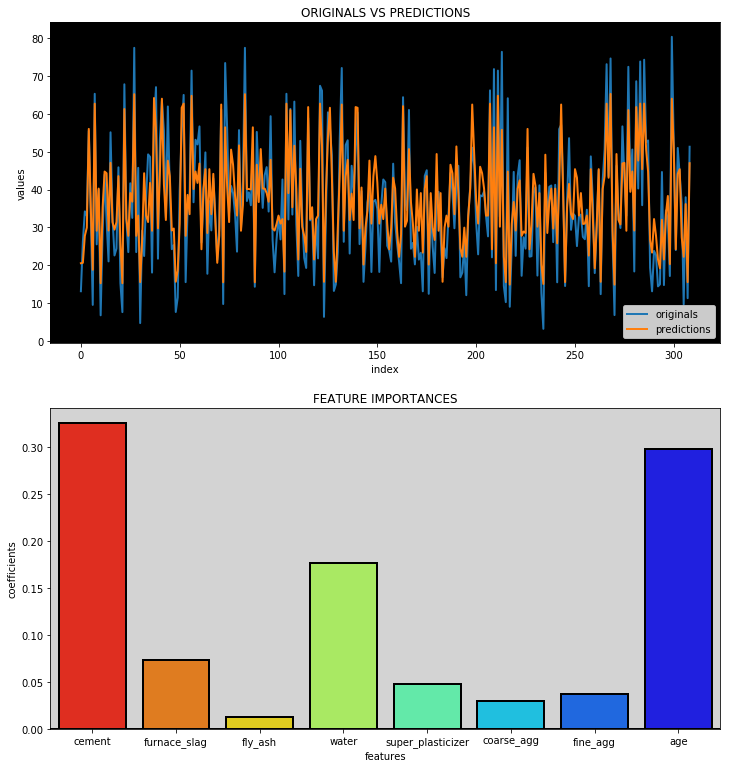

In [46]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
model(adb,train_X,train_Y,test_X,test_Y,"feat")

# ExtraTrees Regressor

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.060315635741839
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -29.245749386160117
cv-std  : 12.465287955973256
cv-max  : -9.299503416666676
cv-min  : -64.9828021111111


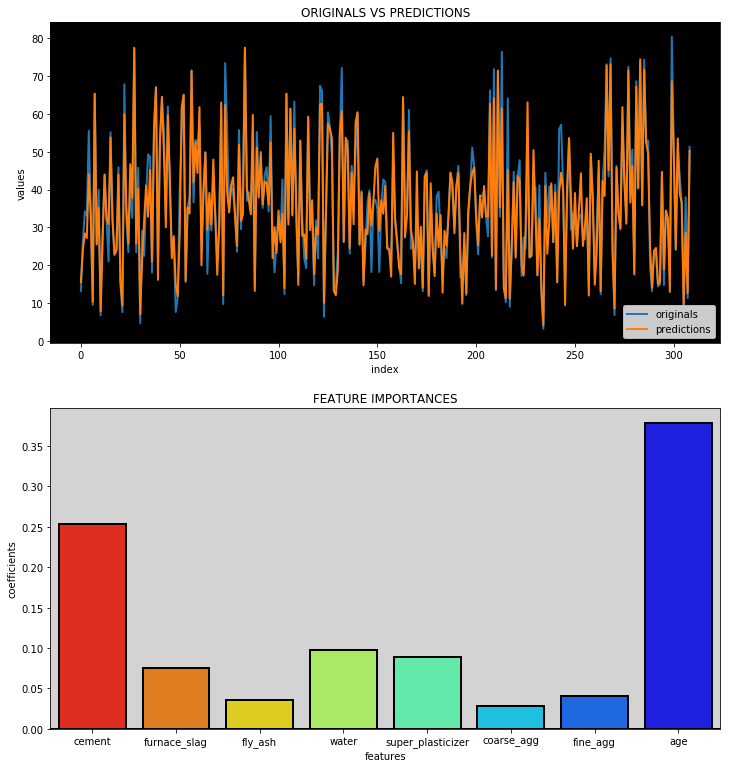

In [47]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
model(etr,train_X,train_Y,test_X,test_Y,"feat")

# Decision Tree Regressor

In [48]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,train_X,train_Y,test_X,test_Y,"feat")

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
***************************************************************************
ROOT MEAN SQUARED ERROR : 6.79365845671809
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -52.129884698865524
cv-std  : 22.034772708457602
cv-max  : -10.45015555555556
cv-min  : -93.26427569444445


# Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model(rf,train_X,train_Y,test_X,test_Y,"feat")

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.436496990244461
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -30.98612957022588
cv-std  : 12.302330026744201
cv-max  : -14.86016508352623
cv-min  : -61.302993938271634


# Gradient Boosting Regressor

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.1451703782968945
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -28.51260052460149
cv-std  : 9.107082528375932
cv-max  : -12.615713750852851
cv-min  : -46.98859414039707


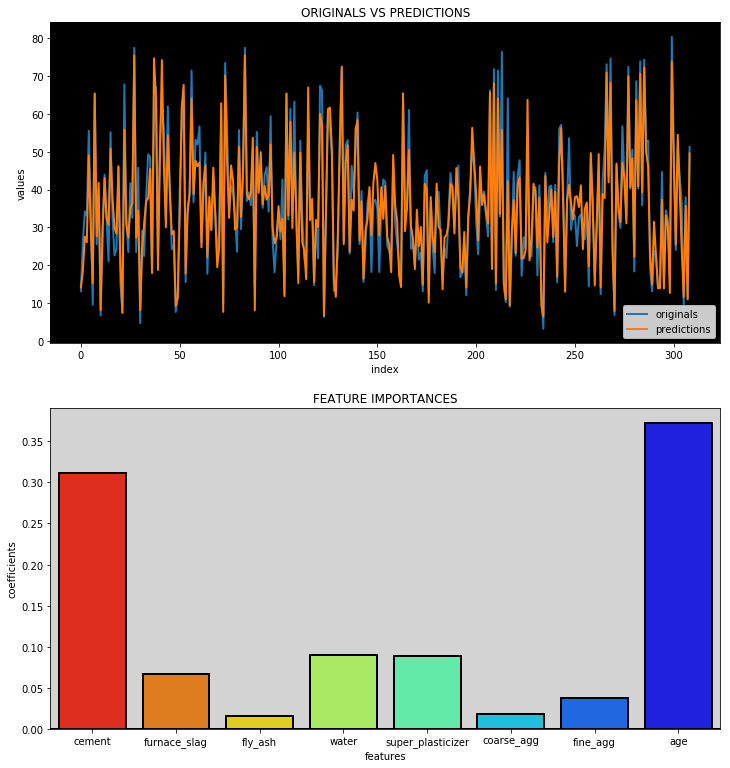

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
model(gbr,train_X,train_Y,test_X,test_Y,"feat")

# XGBoost Regressor

In [51]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr =XGBRegressor()
model(xgr,train_X,train_Y,test_X,test_Y,"feat")

ModuleNotFoundError: No module named 'xgboost'